In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from utils import load_data, plot_3d_scatter
from gen_data import normalise_data

In [2]:
# computes the entropy of a tensor
def calc_entropy(x:torch.Tensor):
    '''
    Computes the (Shannon) entropy of a tensor based on its empirical distribution
    '''
    x = x.flatten()
    freq = x.unique(return_counts=True)[1]
    probs = freq/torch.sum(freq)
    return -torch.multiply(probs, torch.log(probs)).sum()

In [3]:
X, Y = load_data('./data/','complex_test.pkl')

In [4]:
# Y: 10000 data points, 50 time steps, 16 dimensions
calc_entropy(Y[:,-1,:])

tensor(5.3542, device='cuda:0')

In [5]:
# for each dimension
for i in range(16):
    print(f'Output dimension {i+1} entropy:', float(calc_entropy(Y[:,:,i])))

Output dimension 1 entropy: -0.0
Output dimension 2 entropy: 3.862657070159912
Output dimension 3 entropy: 10.81872844696045
Output dimension 4 entropy: 10.819141387939453
Output dimension 5 entropy: 4.219476222991943
Output dimension 6 entropy: 10.81905746459961
Output dimension 7 entropy: 10.819141387939453
Output dimension 8 entropy: 0.19598636031150818
Output dimension 9 entropy: 10.819141387939453
Output dimension 10 entropy: 8.346912384033203
Output dimension 11 entropy: -0.0
Output dimension 12 entropy: -0.0
Output dimension 13 entropy: 0.7508718967437744
Output dimension 14 entropy: 6.26750373840332
Output dimension 15 entropy: 10.819169044494629
Output dimension 16 entropy: 4.086055278778076


In [74]:
# principal component analysis of output

# standardise data
Z_scored_Y = normalise_data(Y.view(-1,16)) # normalise data
Z_scored_Y = Z_scored_Y.cpu().numpy()

cov = np.cov(Z_scored_Y.T)

# eigendecomposition and sort eigenvalues
eigenvals, eigenvecs = np.linalg.eig(cov)

idx = eigenvals.argsort()[::-1]   
eigenvals = eigenvals[idx]
eigenvecs = eigenvecs[:,idx].T

pca = Z_scored_Y @ eigenvecs[:3].T

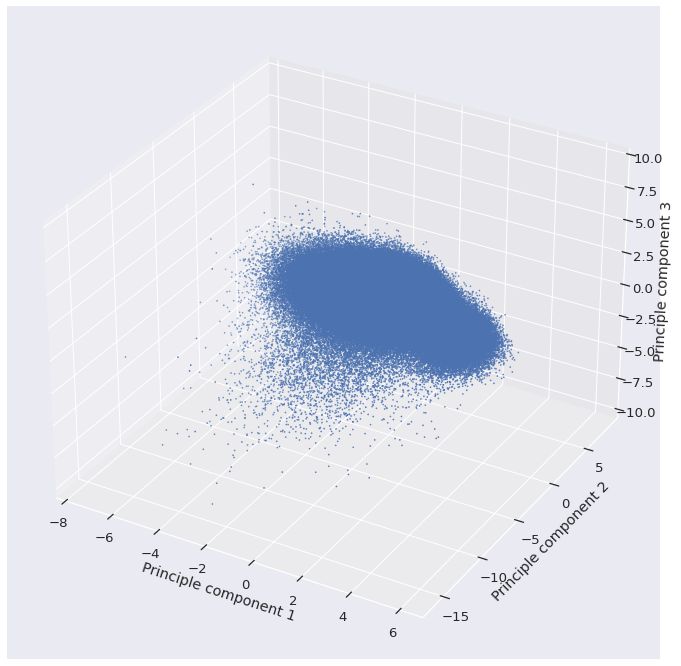

In [75]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
ax.scatter(pca[:,0], pca[:,1], pca[:,2], s=0.5)
ax.set_xlabel('Principle component 1')
ax.set_ylabel('Principle component 2')
ax.set_zlabel('Principle component 3')
plt.show()

Text(0, 0.5, 'PC2')

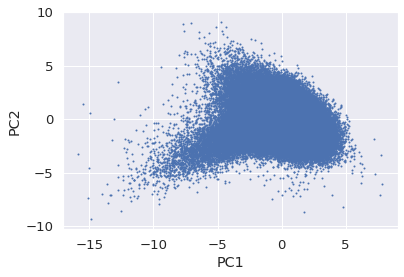

In [98]:
plt.scatter(pca[:,1], pca[:,2], s=1)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [99]:
eigenvals

array([2.34172686, 1.78043683, 1.41312196, 1.0931566 , 1.00262687,
       1.00006582, 0.99996905, 0.95418931, 0.90751246, 0.76834895,
       0.65286719, 0.4568668 , 0.35658771, 0.27252367, 0.        ,
       0.        ])

In [76]:
np.linalg.eig(cov)[1][:,0]

array([ 0.        ,  0.29971202, -0.22276024, -0.38452804, -0.04276843,
        0.05851128, -0.44853758, -0.00068928, -0.1575693 , -0.49939498,
        0.        ,  0.00253464, -0.02234693, -0.06826364,  0.4744723 ,
       -0.04167129])

In [88]:
eigenvals

array([2.34172686, 1.78043683, 1.41312196, 1.0931566 , 1.00262687,
       1.00006582, 0.99996905, 0.95418931, 0.90751246, 0.76834895,
       0.65286719, 0.4568668 , 0.35658771, 0.27252367, 0.        ,
       0.        ])

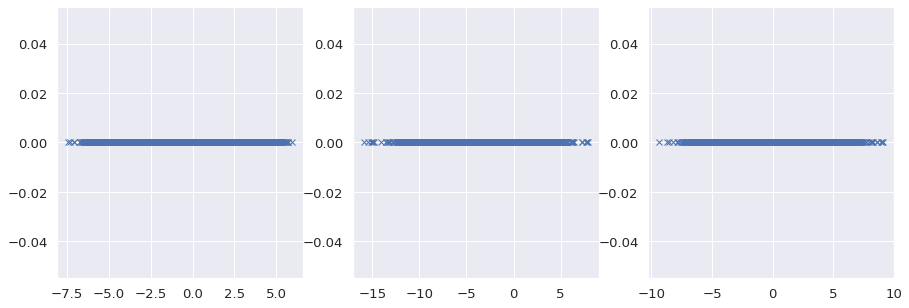

In [87]:
n = len(pca[:,0])
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(pca[:,0], np.zeros(n), 'x')
plt.subplot(132)
plt.plot(pca[:,1], np.zeros(n), 'x')
plt.subplot(133)
plt.plot(pca[:,2], np.zeros(n), 'x')